<a href="https://colab.research.google.com/github/Subhajyoti-Maity/Employee-Attrition-Prediction/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

# Load the dataset from the file you unzipped
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows to confirm it loaded correctly
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [19]:
# Get a summary of your DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

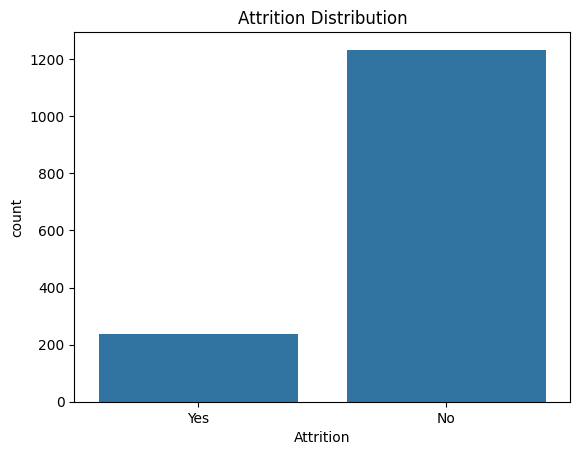

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'Attrition' column
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

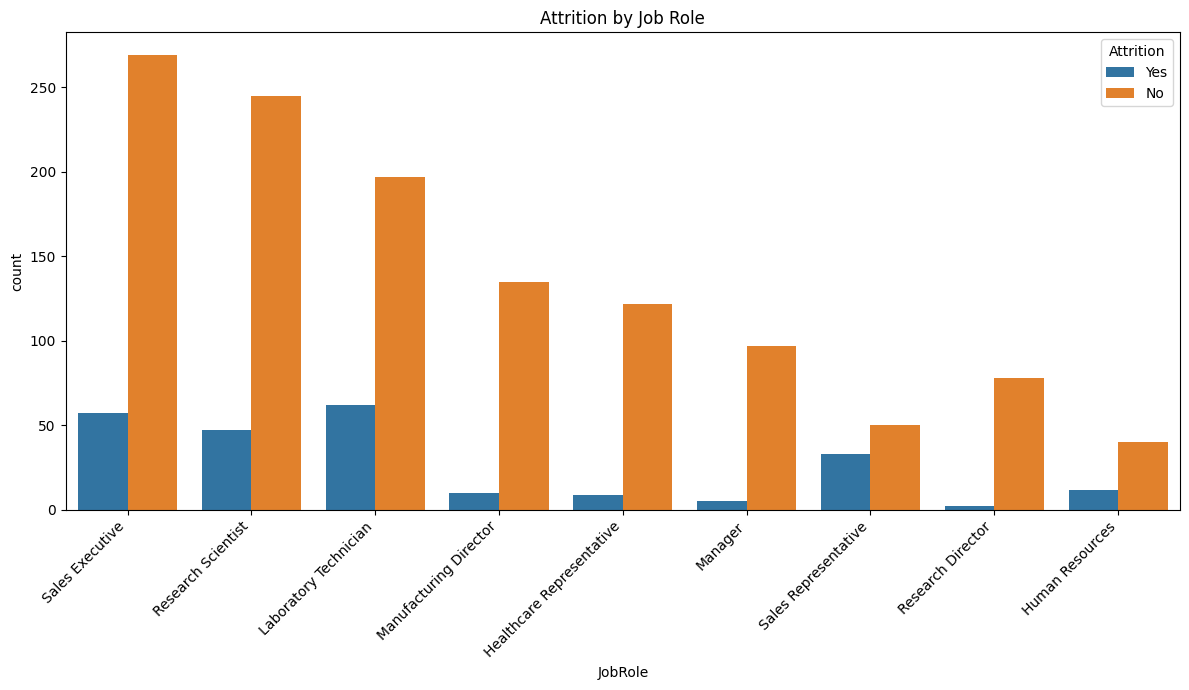

In [21]:
# Create a plot to see attrition across different job roles
plt.figure(figsize=(12, 7)) # Makes the plot wider to fit all job roles
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45, ha='right') # Rotates the x-axis labels for better readability
plt.title('Attrition by Job Role')
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

In [22]:
# Drop columns that are not useful for prediction
df_clean = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Convert all categorical columns into numerical ones.
# This will also automatically handle the 'Attrition' column, creating 'Attrition_Yes'.
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Separate our features (X) from our target (y)
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

# Display the first few rows of your new features data
print("Features (X):")
print(X.head())

Features (X):
   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# stratify=y is important for imbalanced datasets like this one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the new datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 44)
X_test shape: (294, 44)
y_train shape: (1176,)
y_test shape: (294,)


In [24]:
# First, you may need to install the library
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_train_resampled.value_counts())

Original training set shape: Attrition_Yes
False    986
True     190
Name: count, dtype: int64
Resampled training set shape: Attrition_Yes
False    986
True     986
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model on the RESAMPLED data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

print("Model trained successfully!")

Model trained successfully!


In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Check the accuracy of the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Print a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8231292517006803

Classification Report:

              precision    recall  f1-score   support

       False       0.86      0.94      0.90       247
        True       0.40      0.21      0.28        47

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294



In [27]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Re-initialize and resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("--- XGBoost Model ---")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:14:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost Model ---
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       247
        True       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



In [28]:
import joblib
from google.colab import files

# The 'best_xgb_model' variable was created by the GridSearchCV cell you just ran.
# This code saves that new, better model.
joblib.dump(best_xgb_model, 'best_attrition_model.pkl')

# We also save the columns file again to be safe.
model_columns = X.columns.tolist()
joblib.dump(model_columns, 'best_model_columns.pkl')

# Now, download both new files to your computer.
print("Downloading your new, improved model files...")
files.download('best_attrition_model.pkl')
files.download('best_model_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>